<center><h1> South German Credit </h1></center

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('SouthGermanCredit.asc', sep=' ')
data.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Pre-Processing

#### The problem of Imbalanced Learning

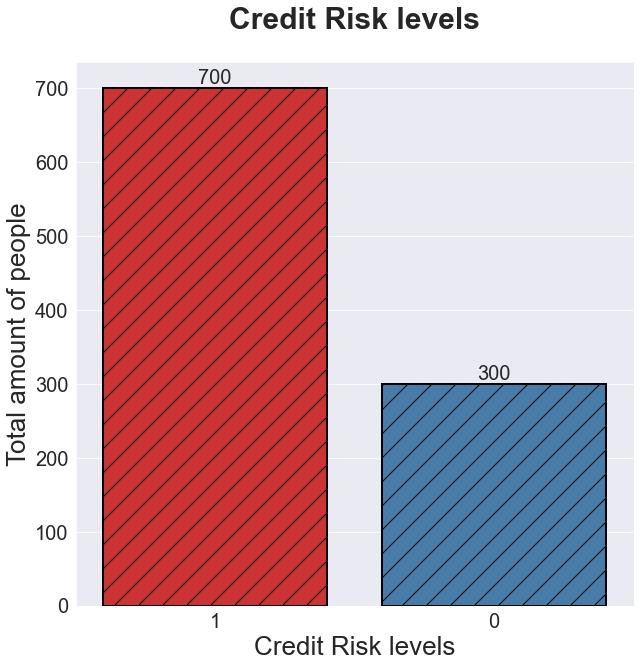

In [3]:
data['credit_risk'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['credit_risk'], order=data['credit_risk'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit Risk levels', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Credit Risk levels', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

As depicted in the bar chart above, the class distribution is heavily skewed, with a ratio of 700-300 between the two classes. This dataset exhibits a notable phenomenon: a significant class imbalance in the explanatory variable. In the context of logistic regression, this class imbalance poses a challenge, as it can lead to 'overfitting.' Overfitting occurs when a model becomes too biased toward the majority class and fails to generalize well to the minority class. 

To mitigate this issue, several strategies can be employed: 
- Acquiring Supplementary Data: One approach to address class imbalance is to obtain additional data for the minority class. However, this may not always be feasible or cost-effective.
- Truncating the Dominant Class: Another approach is to reduce the number of observations in the dominant class to achieve a more balanced class distribution. However, in our case, this solution is less practical because the dataset already contains a relatively small number of observations. Truncating data could lead to a significant loss of information and potentially harm the model's accuracy.
- Synthetic Minority Oversampling (SMOTE): Given our constraints, we've opted for the SMOTE technique. SMOTE is a data augmentation method that generates synthetic observations for the minority class. These synthetic data points are created by interpolating between existing minority class instances, which helps to balance the class distribution without requiring additional real-world data.

SMOTE is an effective approach in our case, as it allows us to address the class imbalance without compromising the dataset's integrity or requiring the acquisition of new data. This ensures that our model can better capture patterns in both the majority and minority classes, improving its overall predictive performance.